# Percentage of Volume (POV) with 3* 3 grid using Minute Bar Data


In [ ]:
# TODO: implement target function and tolerance functions

## Parameters
Parameters: &lt;side&gt; &lt;quantity&gt; &lt;pct_volume&gt; [limit_px] 

side = "b" (buy) or "s" (sell)

quantity = # of shares

pct_volume = percentage of volume to target

limit_px = limit price (optional)

### Structure
1. Get market data
1. Determine order parameters 
1. Initiate loop (reading market data)
    1. Read each bin of data
    1. Calculate % of volume and bin price (last for now)
    1. Accumulate the trade per bin
1. Calculate and plot summary statistics (average price, slippage vs. vwap, vs. arrival, vs. interval vwap

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from datetime import datetime 


## create pov trade function

In [2]:
symbol = 'LYFT'
day = pd.DataFrame() 
%run getstock.py
bars = getMinuteStockPrices(symbol)
day = bars
def pov_trade(qty, pov):
    # get our market data, plot it to sanity check
    trade_results = pd.DataFrame(index = day.index)
        
    # order parameters
    quantity = qty
    pct_volume = pov
    quantity_remaining = quantity
    trades = pd.DataFrame( columns = [ 'price' , 'shares'], index=day.index )

    # main event loop
    for index, row in day.iterrows() :
        # Read each bin of data
        # calculate midpoint of that bar
        px = ( row[ 'high' ] + row[ 'low' ] ) / 2 
        volume = row[ 'volume' ]
    
        # Calculate % of volume and bin price (last for now)
        new_trade = min( pct_volume * volume, quantity_remaining )
    
        # Accumulate the trade per bin
        trades.loc[index] = [px, new_trade]
    
        # decrement the remaining qty, and bail out if it's zero
        quantity_remaining -= new_trade
    
        # debug
        #print( str(volume) + " " + str(new_trade) + " " + str(quantity_remaining) )
    
        if ( quantity_remaining <= 0 ):
            break
            
    ### Analysis of POV Order
    trade_results['mkt_px'] = pd.Series(day['close'])
    trade_results['trade_px'] = pd.Series(trades['price'])
    trade_results['trade_shares'] = pd.Series(trades['shares'])
    return trade_results  

##  implement tolerance functions

In [3]:

qty = [500000, 1000000, 7000000]
pov = [0.05, 0.15, 0.25]
trade_results_dict = {}
k = 0
for i in range(len(qty)):
    for j in range(len(pov)):
        trade_results_dict[k] = pov_trade(qty[i], pov[j])
        k += 1    

## draw 3*3 grid pictures

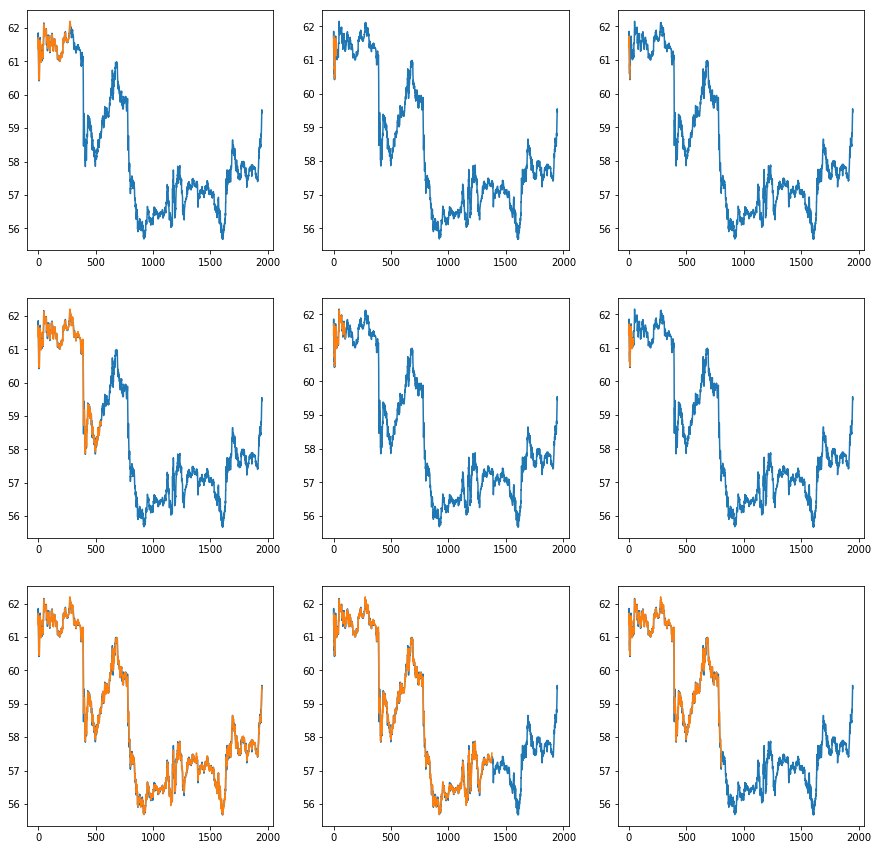

In [4]:
### Let's look at the trade price
N = len(day)
ind = np.arange(N) # the evenly spaced plot indices
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
trade_results0 = trade_results_dict[0]
trade_results0_price = trade_results0.drop('trade_shares', 1)
axes[0, 0].plot(ind, trade_results0_price.mkt_px) 
axes[0, 0].plot(ind, trade_results0_price.trade_px) 
trade_results1 = trade_results_dict[1]
trade_results1_price = trade_results1.drop('trade_shares', 1)
axes[0, 1].plot(ind, trade_results1_price.mkt_px) 
axes[0, 1].plot(ind, trade_results1_price.trade_px) 
trade_results2 = trade_results_dict[2]
trade_results2_price = trade_results2.drop('trade_shares', 1)
axes[0, 2].plot(ind, trade_results2_price.mkt_px) 
axes[0, 2].plot(ind, trade_results2_price.trade_px) 
trade_results3 = trade_results_dict[3]
trade_results3_price = trade_results3.drop('trade_shares', 1)
axes[1, 0].plot(ind, trade_results3_price.mkt_px) 
axes[1, 0].plot(ind, trade_results3_price.trade_px) 
trade_results4 = trade_results_dict[4]
trade_results4_price = trade_results4.drop('trade_shares', 1)
axes[1, 1].plot(ind, trade_results4_price.mkt_px) 
axes[1, 1].plot(ind, trade_results4_price.trade_px) 
trade_results5 = trade_results_dict[5]
trade_results5_price = trade_results5.drop('trade_shares', 1)
axes[1, 2].plot(ind, trade_results5_price.mkt_px) 
axes[1, 2].plot(ind, trade_results5_price.trade_px) 
trade_results6 = trade_results_dict[6]
trade_results6_price = trade_results6.drop('trade_shares', 1)
axes[2, 0].plot(ind, trade_results6_price.mkt_px) 
axes[2, 0].plot(ind, trade_results6_price.trade_px) 
trade_results7 = trade_results_dict[7]
trade_results7_price = trade_results7.drop('trade_shares', 1)
axes[2, 1].plot(ind, trade_results7_price.mkt_px) 
axes[2, 1].plot(ind, trade_results7_price.trade_px) 
trade_results8 = trade_results_dict[8]
trade_results8_price = trade_results8.drop('trade_shares', 1)
axes[2, 2].plot(ind, trade_results8_price.mkt_px) 
axes[2, 2].plot(ind, trade_results8_price.trade_px) 

plt.show()



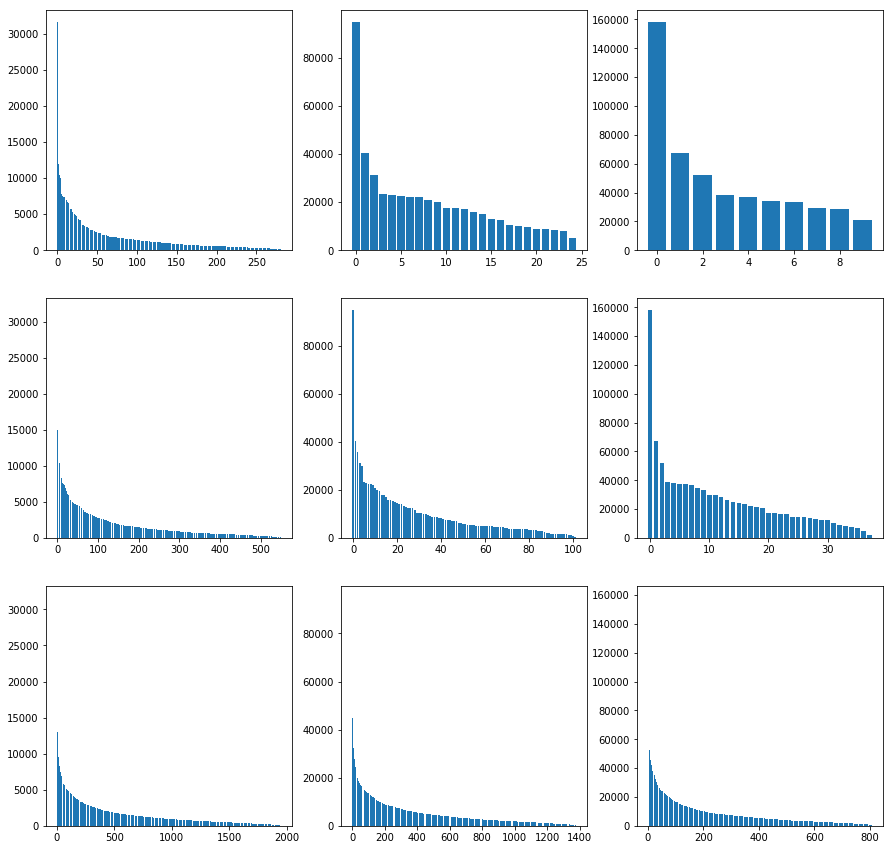

In [5]:
### Let's look at the trade sizes
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
raw_bar0_array = trade_results0['trade_shares'].dropna().sort_values(ascending=False).values
x0 = np.arange(len(raw_bar0_array))
ax[0, 0].bar(x0, raw_bar0_array)
raw_bar1_array = trade_results1['trade_shares'].dropna().sort_values(ascending=False).values
x1 = np.arange(len(raw_bar1_array))
ax[0, 1].bar(x1, raw_bar1_array)
raw_bar2_array = trade_results2['trade_shares'].dropna().sort_values(ascending=False).values
x2 = np.arange(len(raw_bar2_array))
ax[0, 2].bar(x2, raw_bar2_array)
raw_bar3_array = trade_results3['trade_shares'].dropna().sort_values(ascending=False).values
x3 = np.arange(len(raw_bar3_array))
ax[1, 0].bar(x3, raw_bar3_array)
raw_bar4_array = trade_results4['trade_shares'].dropna().sort_values(ascending=False).values
x4 = np.arange(len(raw_bar4_array))
ax[1, 1].bar(x4, raw_bar4_array)
raw_bar5_array = trade_results5['trade_shares'].dropna().sort_values(ascending=False).values
x5 = np.arange(len(raw_bar5_array))
ax[1, 2].bar(x5, raw_bar5_array)
raw_bar6_array = trade_results6['trade_shares'].dropna().sort_values(ascending=False).values
x6 = np.arange(len(raw_bar6_array))
ax[2, 0].bar(x6, raw_bar6_array)
raw_bar7_array = trade_results7['trade_shares'].dropna().sort_values(ascending=False).values
x7 = np.arange(len(raw_bar7_array))
ax[2, 1].bar(x7, raw_bar7_array)
raw_bar8_array = trade_results8['trade_shares'].dropna().sort_values(ascending=False).values
x8 = np.arange(len(raw_bar8_array))
ax[2, 2].bar(x8, raw_bar8_array)
plt.show()

## Calculate the 5 day averages slippage from arrival price and VWAP for your stock as above. 

In [6]:
# average trade price
day_index_pydate_array = day.index.to_pydatetime()
day_index_date_only_array = np.vectorize(lambda s: s.strftime('%Y-%m-%d'))(day_index_pydate_array )
day_index_date_only_df = pd.DataFrame(day_index_date_only_array)
day_index_date = day_index_date_only_df.drop_duplicates()
day_index_date = pd.Series(day_index_date[0].values, index = range(len(day_index_date)))
trade_results_dict_index_date = {}
pavg_dict = {}
average_pavg = []
slippage_dict = {}
slippage_from_arrival_dict = {}
average_slippage = []
average_slippage_from_arrival = []
vwap_dict = {}
trade_results_dict_index_pydate_array = {}
trade_results_dict_index_date_only_array = {}
trade_results_dict_index_date_only_df = {}
trade_results_dict_index_date = {}
k = 9
l = len(day_index_date)

for k in range(k):
    trade_results_dict[k] = trade_results_dict[k].dropna()
    trade_results_dict_index_pydate_array[k] = trade_results_dict[k].index.to_pydatetime()
    trade_results_dict_index_date_only_array[k] = np.vectorize(lambda s: s.strftime('%Y-%m-%d'))(trade_results_dict_index_pydate_array[k] )
    trade_results_dict_index_date_only_df[k] = pd.DataFrame(trade_results_dict_index_date_only_array[k])
    trade_results_dict_index_date[k] = trade_results_dict_index_date_only_df[k].drop_duplicates()
    trade_results_dict_index_date[k] = pd.Series(trade_results_dict_index_date[k][0].values, index = range(len(trade_results_dict_index_date[k])))
    m = len(trade_results_dict_index_date[k])
    pavg_dict[k] = {}
    for m in range(m):
        pavg_dict[k][m] = (trade_results_dict[k][trade_results_dict_index_date[k][m]]['trade_px'] * trade_results_dict[k][trade_results_dict_index_date[k][m]]['trade_shares'] ).sum() /  trade_results_dict[k][trade_results_dict_index_date[k][m]]['trade_shares'].sum()
pavg_df = pd.DataFrame(pavg_dict)
average_pavg.append(pavg_df[k].mean())

# calculate VWAP every day
for l in range(l):
    vwap_dict[l] = (day[day_index_date[l]]['close'] * day[day_index_date[l]]['volume']).sum() / day[day_index_date[l]]['volume'].sum()
vwap_s = pd.Series(vwap_dict)
vwap = vwap_s.mean()

# calculate Average Performance vs Day VWAP 
k = 9
for k in range(k):
    m = len(trade_results_dict_index_date[k])
    slippage_dict[k] = {}
    for m in range(m):
        slippage_dict[k][m] =  ((vwap_s[m] - pavg_dict[k][m]) / vwap_s[m]) * 10000
    slippage_df = pd.DataFrame(slippage_dict)
    average_slippage.append(slippage_df[k].mean())

# calculate Average Performance vs arrival price
k = 9
for k in range(k):
    m = len(trade_results_dict_index_date[k])
    slippage_from_arrival_dict[k] = {}
    for m in range(m):
        slippage_from_arrival_dict[k][m] =  ((trade_results_dict[k].iloc[0, 1] - pavg_dict[k][m]) / trade_results_dict[k].iloc[0, 1]) * 10000
    slippage_from_arrival_df = pd.DataFrame(slippage_from_arrival_dict)
    average_slippage_from_arrival.append(slippage_from_arrival_df[k].mean())


#print("5 days Average Pavg0: {0:.4f} 5 days Average Pavg1: {1:.4f} 5 days Average Pavg2: {2:.4f} 5 days Average Pavg3: {3:.4f} 5 days Average Pavg4: {4:.4f} 5 days Average Pavg5: {5:.4f} 5 days Average Pavg6: {6:.4f} 5 days Average Pavg7: {7:.4f} 5 days Average Pavg8: {8:.4f}  ".format(average_pavg_dict[0], average_pavg_dict[1], average_pavg_dict[2], average_pavg_dict[3], average_pavg_dict[4], average_pavg_dict[5], average_pavg_dict[6], average_pavg_dict[7], average_pavg_dict[8]))
print("Average Performance vs Day VWAP in bps: average_slippage0:{0:.4f} average_slippage1:{1:.4f} average_slippage2:{2:.4f} average_slippage3:{3:.4f} average_slippage4:{4:.4f} average_slippage5:{5:.4f} average_slippage6:{6:.4f} average_slippage7:{7:.4f} average_slippage8:{8:.4f}".format(average_slippage[0], average_slippage[1], average_slippage[2], average_slippage[3], average_slippage[4], average_slippage[5], average_slippage[6], average_slippage[7], average_slippage[8]))
print("Average Performance vs arrival price in bps: average_slippage_from_arrival0:{0:.4f} average_slippage_from_arrival1:{1:.4f} average_slippage_from_arrival2:{2:.4f} average_slippage_from_arrival3:{3:.4f} average_slippage_from_arrival4:{4:.4f} average_slippage_from_arrival5:{5:.4f} average_slippage_from_arrival6:{6:.4f} average_slippage_from_arrival7:{7:.4f} average_slippage_from_arrival8:{8:.4f}".format(average_slippage_from_arrival[0], average_slippage_from_arrival[1], average_slippage_from_arrival[2], average_slippage_from_arrival[3], average_slippage_from_arrival[4], average_slippage_from_arrival[5], average_slippage_from_arrival[6], average_slippage_from_arrival[7], average_slippage_from_arrival[8]))

Average Performance vs Day VWAP in bps: average_slippage0:-0.2623 average_slippage1:39.3579 average_slippage2:41.3704 average_slippage3:44.7248 average_slippage4:8.5291 average_slippage5:41.3720 average_slippage6:0.0234 average_slippage7:-2.9323 average_slippage8:-81.3820
Average Performance vs arrival price in bps: average_slippage_from_arrival0:-11.2618 average_slippage_from_arrival1:28.4020 average_slippage_from_arrival2:30.4167 average_slippage_from_arrival3:210.6687 average_slippage_from_arrival4:-2.4607 average_slippage_from_arrival5:30.4183 average_slippage_from_arrival6:482.0159 average_slippage_from_arrival7:447.3378 average_slippage_from_arrival8:290.3121


## Calculate the opportunity cost

In [7]:
k = 9
opportunity_cost_dict = {}
for i in range(len(qty)):
    for n in range(3):
        k = n + 3 * i
        opportunity_cost_dict[k] = round((qty[i] - trade_results_dict[k]['trade_shares'].sum()) * (trade_results_dict[k].iloc[- 1, 1] - trade_results_dict[k].iloc[0, 1]), 4)
print(" Opportunity cost in bps:  opportunity_cost0:{0:.4f}  opportunity_cost1:{1:.4f} opportunity_cost2:{2:.4f}  opportunity_cost3:{3:.4f}  opportunity_cost4:{4:.4f}  opportunity_cost5:{5:.4f}  opportunity_cost6:{6:.4f}  opportunity_cost7:{7:.4f}  opportunity_cost8:{8:.4f}".format( opportunity_cost_dict[0],  opportunity_cost_dict[1],  opportunity_cost_dict[2],  opportunity_cost_dict[3],  opportunity_cost_dict[4],  opportunity_cost_dict[5],  opportunity_cost_dict[6],   opportunity_cost_dict[7],  opportunity_cost_dict[8]))

 Opportunity cost in bps:  opportunity_cost0:0.0000  opportunity_cost1:0.0000 opportunity_cost2:-0.0000  opportunity_cost3:-0.0000  opportunity_cost4:-0.0000  opportunity_cost5:-0.0000  opportunity_cost6:-7417705.4368  opportunity_cost7:-0.0000  opportunity_cost8:-0.0000
